<a href="https://colab.research.google.com/github/onuralpArsln/MlAiTutorialProjects/blob/main/12-VideoSources/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regresyon

# Gerekli Kütüphaneler

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Veri seti

Kaggleden aldığımız bir veri seti kullanacağız. veri seti linki https://www.kaggle.com/datasets/sohier/calcofi?select=bottle.csv

Bu su sıcaklığı ve su tuzluluğunun ilişkisini anlatan veri seti Kalforniyadan toplanan verilerden oluşur.


In [2]:
!wget -q  https://raw.githubusercontent.com/onuralpArsln/MlAiTutorialProjects/refs/heads/main/12-VideoSources/CalCOFI_reduced.csv


Verilere ilk bakışı yapalım

In [4]:
#pandas kullanarak okuma yap
df = pd.read_csv("CalCOFI_reduced.csv")

# İlk 5 satırı yazdır
print(df.head())

# Veri setindeki sütun isimlerini kontrol edelim
print(df.columns)

   Depthm  T_degC  Salnty
0       0   10.50  33.440
1       8   10.46  33.440
2      10   10.46  33.437
3      19   10.45  33.420
4      20   10.45  33.421
Index(['Depthm', 'T_degC', 'Salnty'], dtype='object')


Veri temizliği için eksik veri varmı bakalım eksik veri olan satırları sileceğiz

In [5]:
print(df.isnull().sum())

Depthm      0
T_degC    202
Salnty    875
dtype: int64


In [6]:
df = df.dropna(subset=['Depthm', 'T_degC', 'Salnty'])


In [7]:
print(df.isnull().sum())

Depthm    0
T_degC    0
Salnty    0
dtype: int64


# Isı haritası ile hızlı analiz

Bu ısı haritası (heatmap) bize, su derinliği, sıcaklık ve tuzluluk arasındaki ilişkiyi gösterir. 1’e yakın korelasyonlar güçlü ilişki olduğunu, -1’e yakın olanlar ise negatif ilişki olduğunu gösterir.

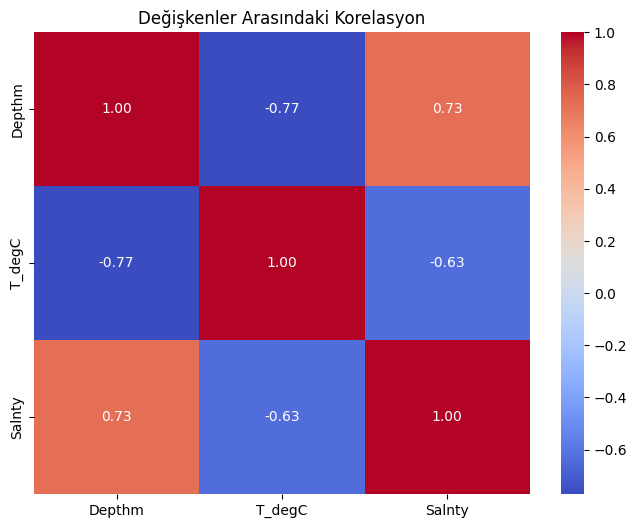

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Depthm', 'T_degC', 'Salnty']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Değişkenler Arasındaki Korelasyon")
plt.show()

# Veri Noktaları İle Analiz

İki eksende verilerimizin dağılımlarını görmek için scatterplot kullanımı

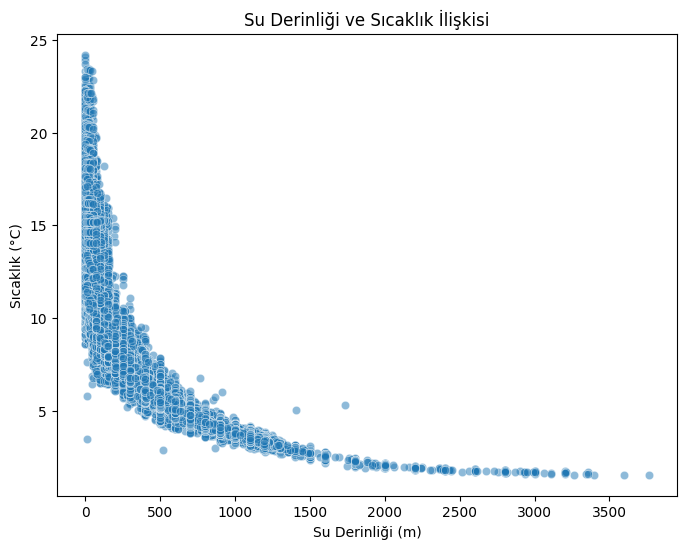

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Depthm'], y=df['T_degC'], alpha=0.5)
plt.xlabel("Su Derinliği (m)")
plt.ylabel("Sıcaklık (°C)")
plt.title("Su Derinliği ve Sıcaklık İlişkisi")
plt.show()

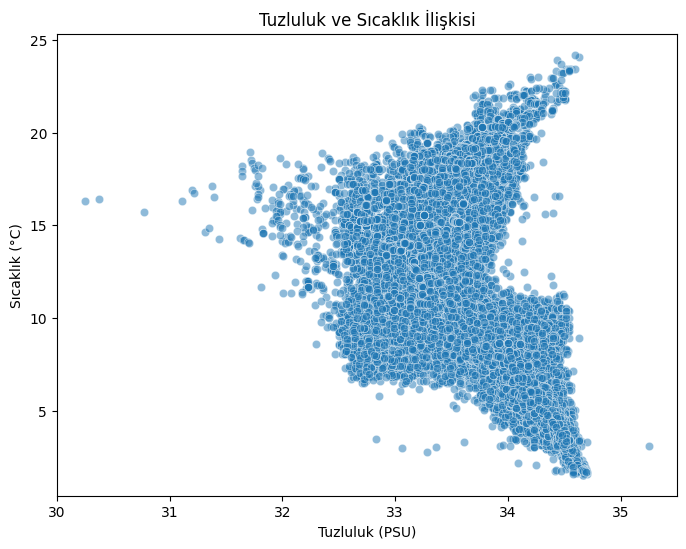

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Salnty'], y=df['T_degC'], alpha=0.5)
plt.xlabel("Tuzluluk (Practical Salinity Unit)")
plt.ylabel("Sıcaklık (°C)")
plt.title("Tuzluluk ve Sıcaklık İlişkisi")
plt.show()

# psu 0 saf su

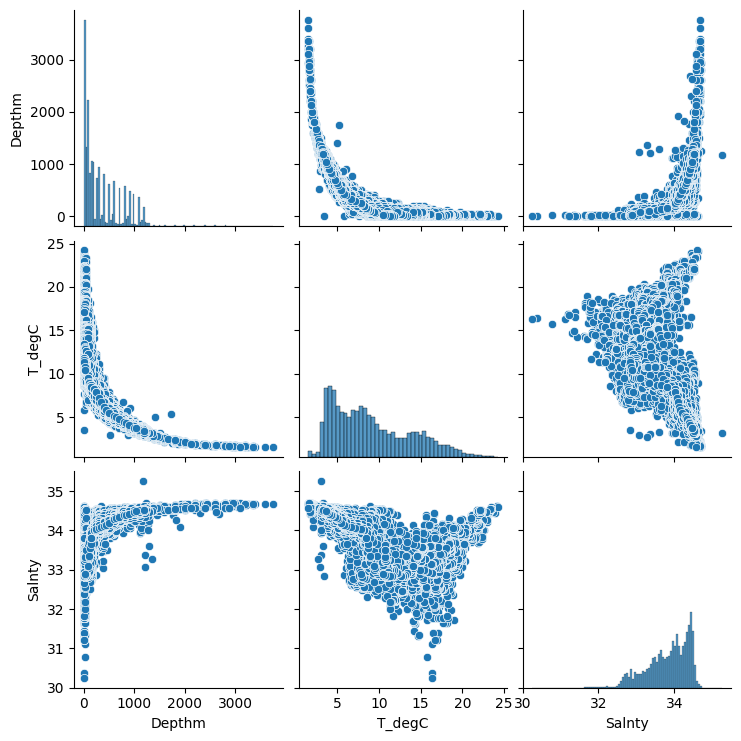

In [11]:
#Farklı grafikleri hızlı hızlı göstermek
sns.pairplot(df[['Depthm', 'T_degC', 'Salnty']])
plt.show()

# Bir Regresyon modeli oluşturmak

Amacımız verilen girdilere bağlı bir çıktı tahmin etmek, mesela su sıcaklığı ve deinliğe bağlı olarak tuzluluk oranı nedir?

Veriyi eğitim ve test seti için ayır

Modeli oluştur

Pozitif katsayı → Değişken arttıkça hedef değişken (tuzluluk) artar.    
Negatif katsayı → Değişken arttıkça hedef değişken (tuzluluk) azalır.    
ilki depthm için ikincisi ise tdegc için

R² (Determination Coefficient): Modelin ne kadar iyi tahmin yaptığını gösterir. 1'e yakınsa iyi bir modeldir.   
MSE: Hata oranlarını gösterir. Düşük olmalıdır.

Linear Regression: RMSE = 0.36, R² = 0.55
Polynomial Regression (degree=3): RMSE = 0.25, R² = 0.79
Ridge Regression: RMSE = 0.36, R² = 0.55
Lasso Regression: RMSE = 0.38, R² = 0.51
Random Forest Regressor: RMSE = 0.27, R² = 0.75
SVR: RMSE = 0.24, R² = 0.80

🏅 En iyi model: SVR


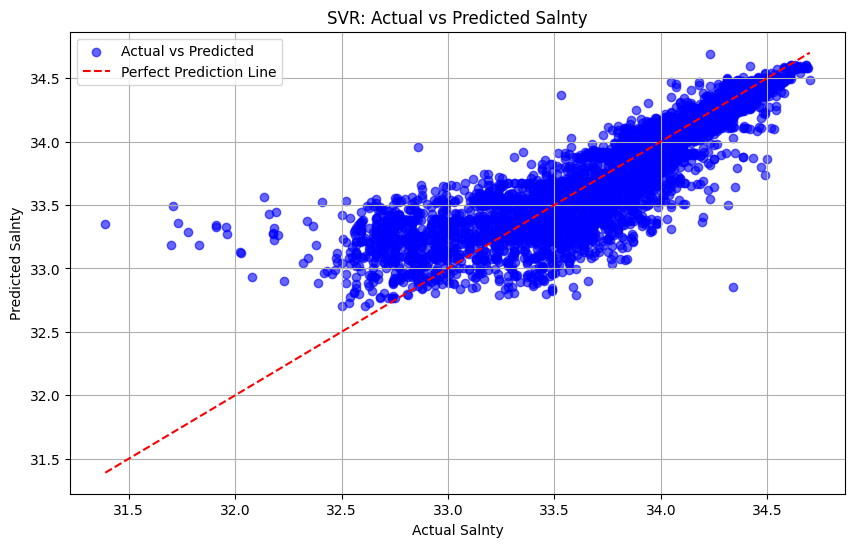

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Veriyi yükle
df = pd.read_csv('CalCOFI_reduced.csv')
df = df.dropna(subset=['Depthm', 'T_degC', 'Salnty'])

# Girdi ve çıktı değişkenlerini tanımla
X = df[['Depthm', 'T_degC']]
y = df['Salnty']


# Veriyi eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirelim
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polinom özellikleri oluştur ve fit et
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

# Modelleri tanımla
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (degree=3)": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.1),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100),
    "SVR": SVR(kernel='rbf', C=1)
}

# Modelleri eğit ve değerlendir
results = {}
for name, model in models.items():
    if "Polynomial" in name:
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    # Performans ölçümleri
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R²": r2}

# Sonuçları göster
for model, metrics in results.items():
    print(f"{model}: RMSE = {metrics['RMSE']:.2f}, R² = {metrics['R²']:.2f}")

# En iyi modeli seçip görselleştirelim
best_model = max(results, key=lambda x: results[x]['R²'])
print(f"\n🏅 En iyi model: {best_model}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Salnty')
plt.ylabel('Predicted Salnty')
plt.legend()
plt.title(f'{best_model}: Actual vs Predicted Salnty')
plt.grid(True)
plt.show()
